<a href="https://colab.research.google.com/github/atharvafalle/MITWPU/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RFE Selected Features: Index(['Weeks', 'Age (years)'], dtype='object')
Logistic Regression with RFE Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        31
           1       0.62      0.45      0.52        29

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.59        60
weighted avg       0.60      0.60      0.59        60



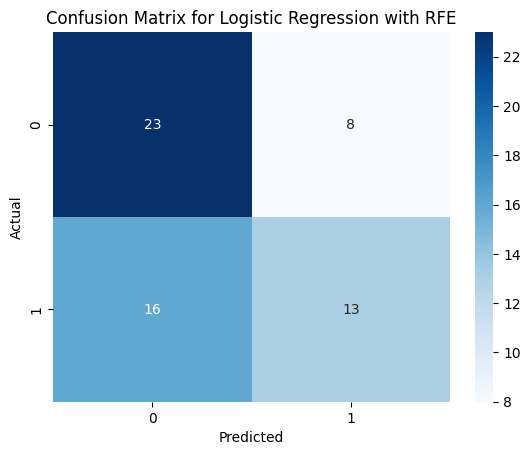

Backward Feature Elimination Selected Features: Index(['Cumulative Weeks', 'Age (years)'], dtype='object')
Logistic Regression with Backward Feature Elimination Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57        31
           1       0.55      0.59      0.57        29

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.57      0.57      0.57        60



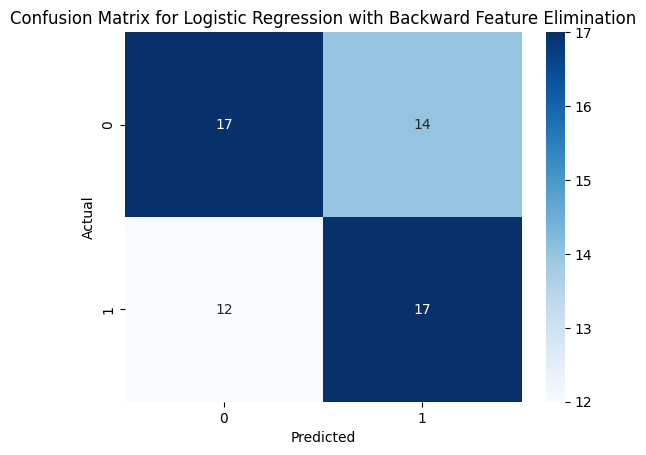

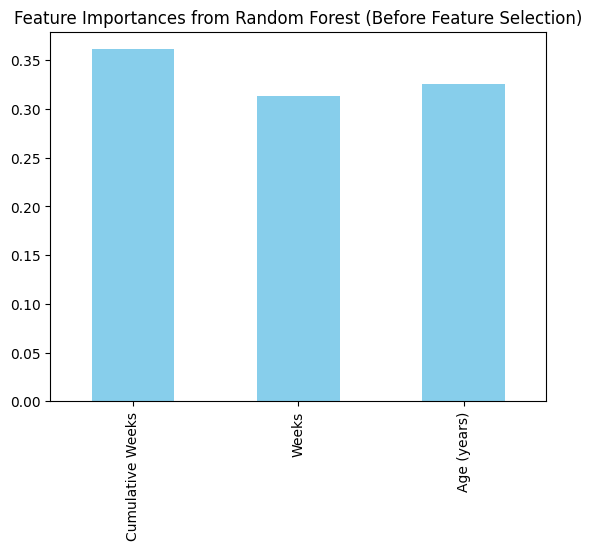

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Embedded Method Selected Features: Index(['Cumulative Weeks'], dtype='object')
Random Forest with Embedded Method Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.58      0.63        31
           1       0.62      0.72      0.67        29

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



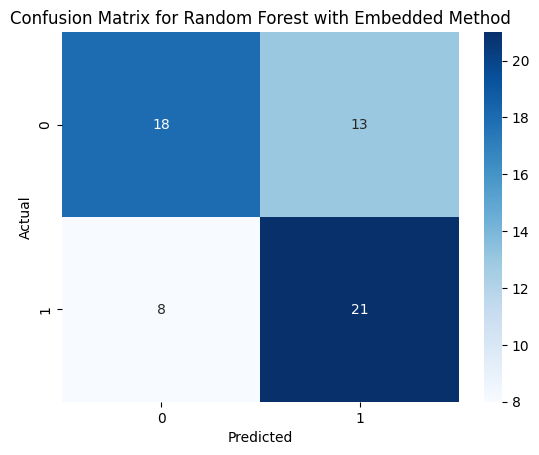

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.56        31
           1       0.52      0.48      0.50        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.53      0.53      0.53        60



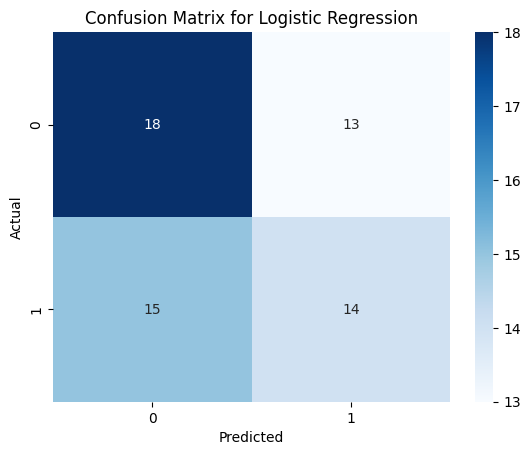

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        31
           1       0.52      0.52      0.52        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.53      0.53      0.53        60



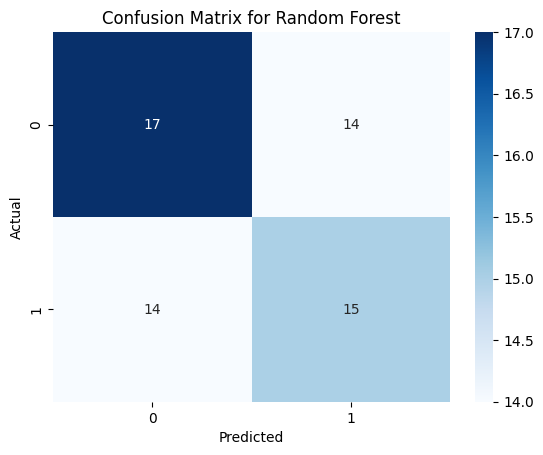

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51        31
           1       0.46      0.45      0.46        29

    accuracy                           0.48        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.48      0.48      0.48        60



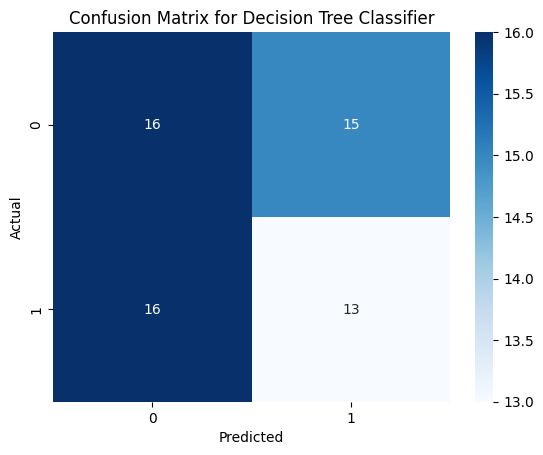

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/atp.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Encode the target variable (Sex) as 0 and 1
df['Sex_encoded'] = LabelEncoder().fit_transform(df['Sex'])

# Select relevant features and target
X = df[['Cumulative Weeks', 'Weeks', 'Age (years)']]  # Features
y = df['Sex_encoded']  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Wrapper Method: Recursive Feature Elimination (RFE) with Logistic Regression
logistic_model = LogisticRegression()
rfe = RFE(logistic_model, n_features_to_select=2)  # Select top 2 features
X_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)  # Transform test set

logistic_model.fit(X_rfe, y_train)
y_pred_rfe = logistic_model.predict(X_test_rfe)
print("RFE Selected Features:", X.columns[rfe.support_])
print("Logistic Regression with RFE Classification Report:\n", classification_report(y_test, y_pred_rfe))

# Plotting Confusion Matrix for Logistic Regression with RFE
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression with RFE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Backward Feature Elimination using SequentialFeatureSelector
sfs = SequentialFeatureSelector(logistic_model, n_features_to_select=2, direction='backward')
sfs.fit(X_train, y_train)
X_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

logistic_model.fit(X_sfs, y_train)
y_pred_sfs = logistic_model.predict(X_test_sfs)
print("Backward Feature Elimination Selected Features:", X.columns[sfs.get_support()])
print("Logistic Regression with Backward Feature Elimination Classification Report:\n", classification_report(y_test, y_pred_sfs))

# Plotting Confusion Matrix for Logistic Regression with Backward Feature Elimination
conf_matrix_sfs = confusion_matrix(y_test, y_pred_sfs)
sns.heatmap(conf_matrix_sfs, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression with Backward Feature Elimination')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Embedded Method: Using Feature Importances from Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Plotting Feature Importances from Random Forest for reference (Before Feature Selection)
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances from Random Forest (Before Feature Selection)")
plt.show()

# Use SelectFromModel with Random Forest
sfm = SelectFromModel(random_forest_model, threshold='mean', prefit=True)
X_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

# Re-fit the random forest model on the selected features
random_forest_model.fit(X_sfm, y_train)
y_pred_sfm = random_forest_model.predict(X_test_sfm)

# Fix: Use sfm.get_support(indices=True) to align with column names
selected_features = X.columns[sfm.get_support(indices=True)]
print("Embedded Method Selected Features:", selected_features)

print("Random Forest with Embedded Method Classification Report:\n", classification_report(y_test, y_pred_sfm))

# Plotting Confusion Matrix for Random Forest with Embedded Method
conf_matrix_sfm = confusion_matrix(y_test, y_pred_sfm)
sns.heatmap(conf_matrix_sfm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest with Embedded Method')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Standard Models for Comparison
# Logistic Regression without feature selection
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Plotting Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier without feature selection
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plotting Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier without feature selection
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plotting Confusion Matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()